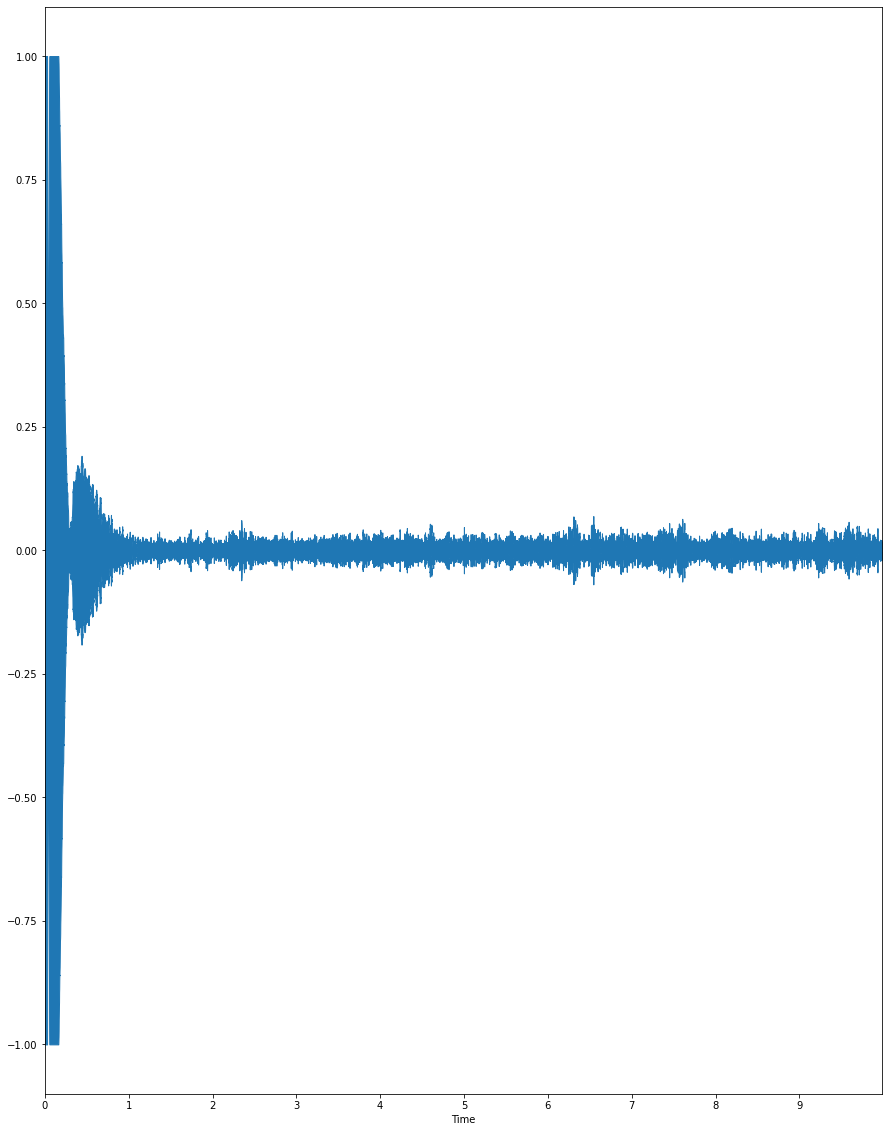

In [52]:
import numpy as np 
import matplotlib.pyplot as plt
import librosa
import librosa.display
import pyaudio
import wave
from IPython.display import Audio


def carregarAudio(sound_file):
    return librosa.load(sound_file, sr=44100)


def gerarGrafico(data, fs, sound_file):
    D = librosa.amplitude_to_db(np.abs(librosa.stft(data)))
    librosa.display.specshow(D, x_axis='time', y_axis='linear', sr=fs, cmap='CMRmap')
    plt.title('Espectrograma ' + sound_file)
    plt.xlabel('Tempo [s]')
    plt.ylabel('Frequência [Hz]')
    plt.colorbar(format='%+2.0f dB')
    
    
def exibirEspectrograma(sound_file):
    data, fs = carregarAudio(sound_file)
    dimensoesGrafico(15, 7)
    gerarGrafico(data, fs, sound_file)
    

def dimensoesGrafico(x, y):
    plt.figure(figsize=(x, y))


def exibirOscilograma(sound_file):
    data, fs = carregarAudio(sound_file)
    dimensoesGrafico(15, 20)
    librosa.display.waveplot(data, fs)
    
    
def gravarAudio(sound_file):
    chunk = 1024
    formato = pyaudio.paInt16
    canais = 1
    taxaDeAmostragem = 44100
    tempoDeGravacao = 10
    nomeArquivoSaida = sound_file + ".wav"
 
     
 
    deltaX= 1.0/taxaDeAmostragem
     
    objetoPyAudio = pyaudio.PyAudio()
     
    streamMic = objetoPyAudio.open(format=formato,channels=canais, rate=taxaDeAmostragem, input=True, frames_per_buffer=chunk)
 
 
 
    framesWav = []
 
    #captura dados do microfone
    for nLoop in range(0, int(taxaDeAmostragem / chunk * tempoDeGravacao)):
        dadosLidosMic = streamMic.read(chunk)
        framesWav.append(dadosLidosMic)
    #framesWav é uma lista com 215 "chunks" de 1024 amostras
 
    streamMic.stop_stream()
    streamMic.close()
    objetoPyAudio.terminate()
     
    #criamos uma única lista com todos os bytes encadeados
    framesWavJuntos= b''.join(framesWav)
 
 
    #salvamos o arquivo wave
    arquivoWav = wave.open(nomeArquivoSaida, 'wb')
    arquivoWav.setnchannels(canais)
    arquivoWav.setsampwidth(objetoPyAudio.get_sample_size(formato))
    arquivoWav.setframerate(taxaDeAmostragem)
    arquivoWav.writeframes(framesWavJuntos)
    arquivoWav.close() 
    
    return nomeArquivoSaida

#sound_file = gravarAudio("voz")
#exibirEspectrograma(sound_file)
exibirOscilograma("voz.wav")

In [51]:
data, fs = carregarAudio(sound_file)
Audio(data = data, rate = fs)